In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(0.9849191806417825+0j)
(0.08959914042841867-5.551115123125783e-17j)


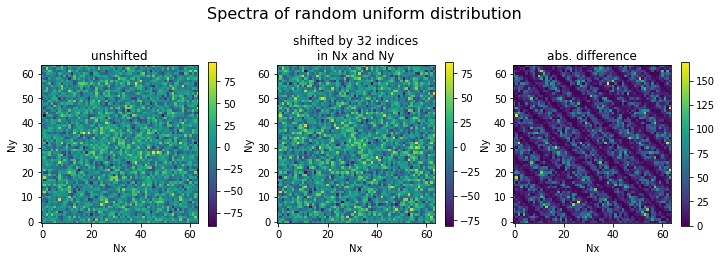

0.09815773205678409
0.0980292106391463


In [31]:
Nx = 64
Ny = Nx
Lx = 8.0
Ly = 6.0

x = np.arange(0,Nx)
x = x * 1./Nx
y = np.arange(0,Ny)
y = y * 1./Ny

# a = np.cos(3. * np.pi / 4 * x) + np.sin(4. * np.pi * x)
# b = np.cos(3. * np.pi * y) + np.sin(np.pi * y / 2.)

xx, yy = np.meshgrid(x,y)

a = np.random.uniform(-1.0,1.0,size=(xx.shape[0],xx.shape[1]))
b = np.roll(a,5,axis=0)
b = np.roll(b,5,axis=1)

u = np.fft.fft2(a)
v = np.fft.fft2(b)

print(u.mean())
print(v.mean())

# plt.figure()
# plt.imshow(u.real)
# plt.colorbar()
# plt.show()

# plt.figure()
# plt.imshow(np.abs(v.real - u.real))
# plt.colorbar()
# plt.show()

fig, ax = plt.subplots(ncols=3, figsize=(12,6))
im0 = ax[0].imshow(u.real, origin="lower")
plt.colorbar(im0,ax=ax[0],shrink=.5)
ax[0].set_title("unshifted")
ax[0].set_xlabel("Nx")
ax[0].set_ylabel("Ny")

im1 = ax[1].imshow(v.real, origin="lower")
plt.colorbar(im1,ax=ax[1],shrink=.5)
ax[1].set_title("shifted by 32 indices\nin Nx and Ny")
ax[1].set_xlabel("Nx")
ax[1].set_ylabel("Ny")

im2 = ax[2].imshow(np.abs(u.real - v.real), origin="lower")
plt.colorbar(im2,ax=ax[2],shrink=.5)
ax[2].set_title("abs. difference")
ax[2].set_xlabel("Nx")
ax[2].set_ylabel("Ny")

plt.suptitle("Spectra of random uniform distribution", y=0.82, fontsize=16)
plt.show()

I = np.copy(Z)
Io = np.copy(Zo)
for dim in range(2):
    I = integrate.trapz(I,axis=0,x=x)
    Io = integrate.trapz(Io,axis=0,x=x)
print(I)
print(Io)

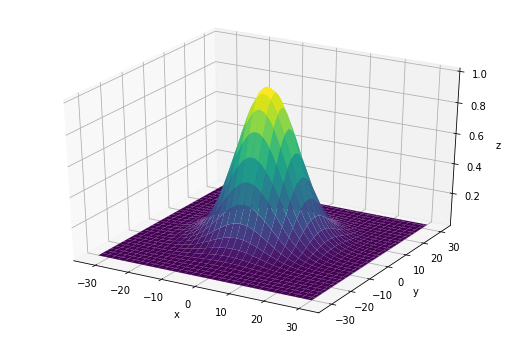

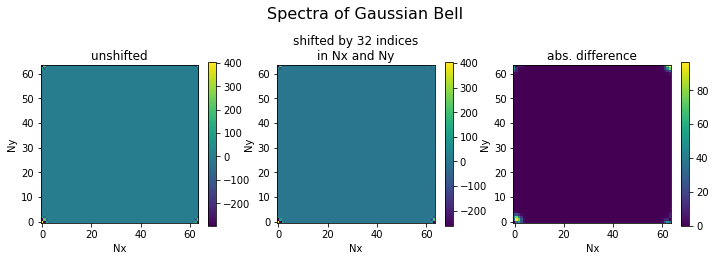

402.05590307283643
401.90682178286033


In [107]:
from mpl_toolkits import mplot3d
from scipy import stats, integrate
%matplotlib inline

x = (np.arange(0,64) - 32.0)
X,Y = np.meshgrid(x,x)

pos = np.array([X.flatten(),Y.flatten()]).T
norm = stats.multivariate_normal([0,0],[[64,0],[0,64]])
Z = norm.pdf(pos).reshape(X.shape[0],X.shape[1])
Z /= Z.max()

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis',linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

Zo = np.roll(Z,5,axis=0)
Zo = np.roll(Zo,5,axis=1)
dx = x[1] - x[0]

Zs = np.fft.fft2(Z)
Zos = np.fft.fft2(Zo)

fig, ax = plt.subplots(ncols=3, figsize=(12,6))
im0 = ax[0].imshow(Zs.real, origin="lower")
plt.colorbar(im0,ax=ax[0],shrink=.5)
ax[0].set_title("unshifted")
ax[0].set_xlabel("Nx")
ax[0].set_ylabel("Ny")

im1 = ax[1].imshow(Zos.real, origin="lower")
plt.colorbar(im1,ax=ax[1],shrink=.5)
ax[1].set_title("shifted by 32 indices\nin Nx and Ny")
ax[1].set_xlabel("Nx")
ax[1].set_ylabel("Ny")

im2 = ax[2].imshow(np.abs(Zs.real - Zos.real), origin="lower")
plt.colorbar(im2,ax=ax[2],shrink=.5)
ax[2].set_title("abs. difference")
ax[2].set_xlabel("Nx")
ax[2].set_ylabel("Ny")

plt.suptitle("Spectra of Gaussian Bell", y=0.82, fontsize=16)
plt.show()

I = np.copy(Z)
Io = np.copy(Zo)
dd = 0.
ddo = 0.
for dim in range(2):
    I = integrate.simps(I.real,dx=dx)
    Io = integrate.simps(Io.real,dx=dx)
print(I)
print(Io)

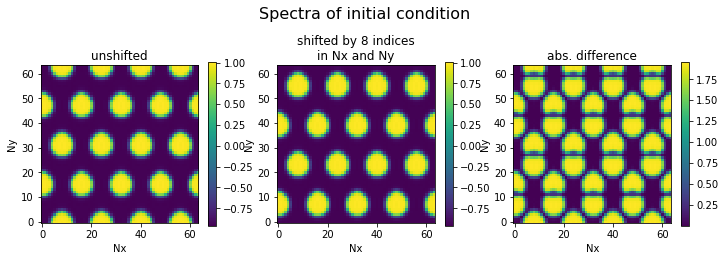

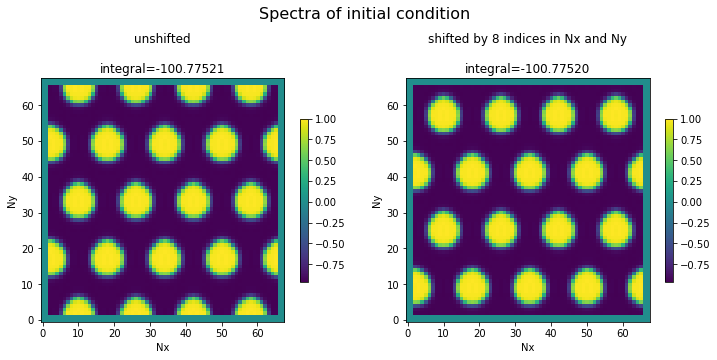

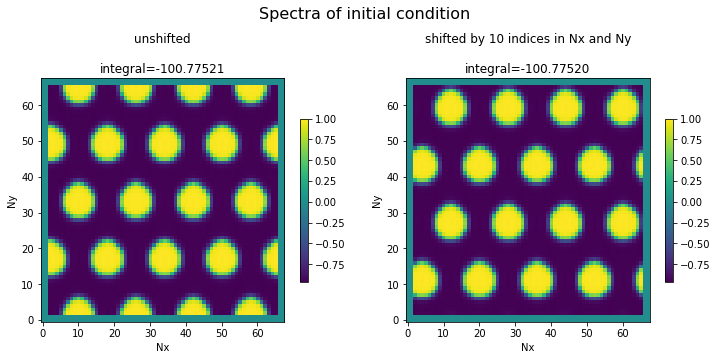

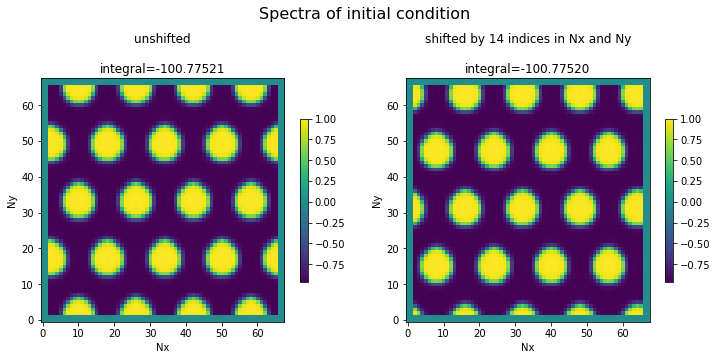

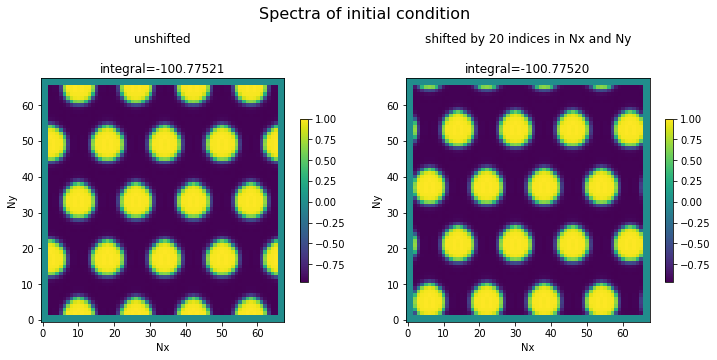

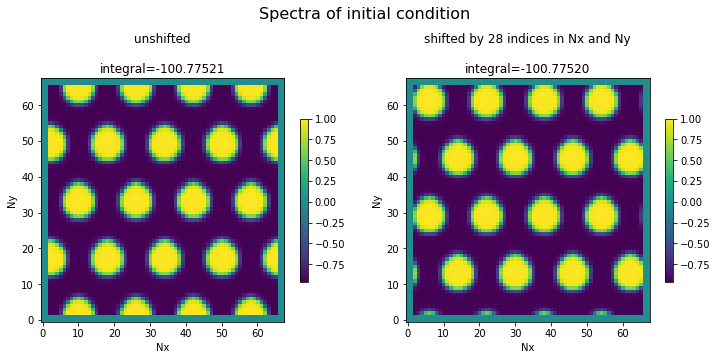

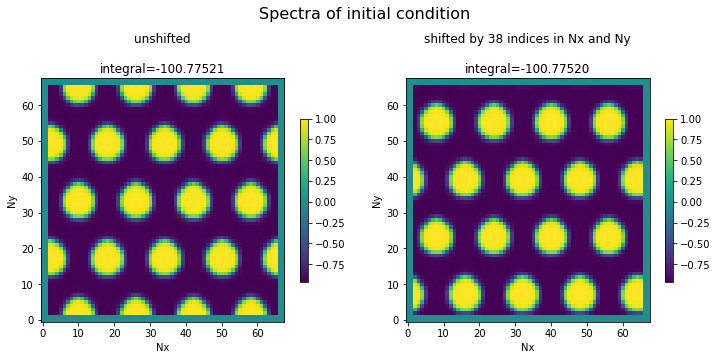

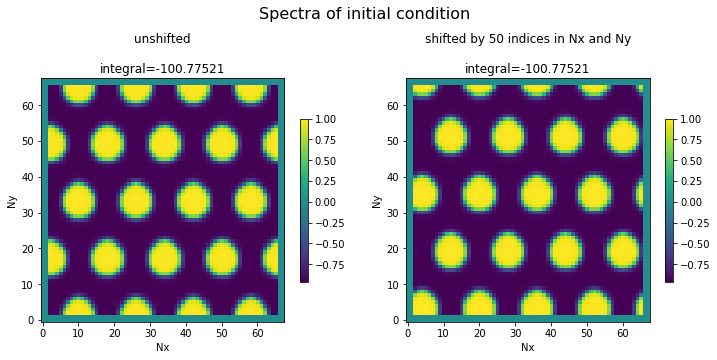

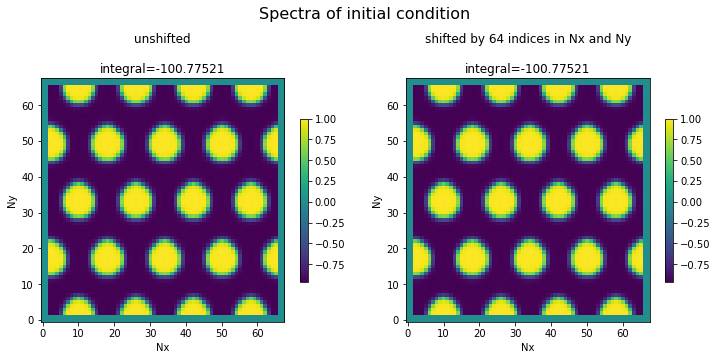

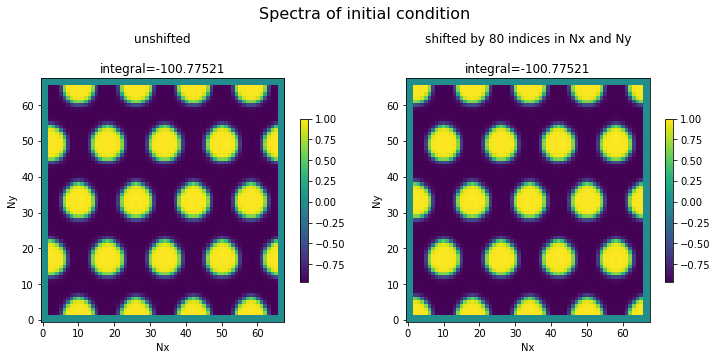

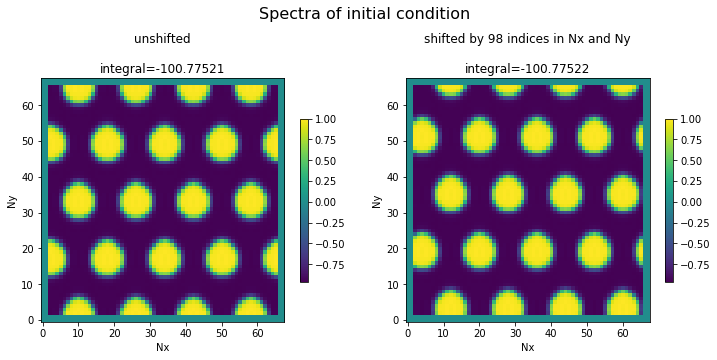

In [155]:
import h5py
file = h5py.File('/home/ray/git-projects/modified_ch/ic_2periods.h5')
u = file['ic'][...]
file.close()

rl_idx = 8
uo = np.roll(u,rl_idx,axis=0)
uo = np.roll(uo,rl_idx,axis=1)

fig, ax = plt.subplots(ncols=3, figsize=(12,6))
im0 = ax[0].imshow(u, origin="lower")
plt.colorbar(im0,ax=ax[0],shrink=.5)
ax[0].set_title("unshifted")
ax[0].set_xlabel("Nx")
ax[0].set_ylabel("Ny")

im1 = ax[1].imshow(uo, origin="lower")
plt.colorbar(im1,ax=ax[1],shrink=.5)
ax[1].set_title("shifted by %i indices\nin Nx and Ny" %rl_idx)
ax[1].set_xlabel("Nx")
ax[1].set_ylabel("Ny")

im2 = ax[2].imshow(np.abs(u - uo), origin="lower")
plt.colorbar(im2,ax=ax[2],shrink=.5)
ax[2].set_title("abs. difference")
ax[2].set_xlabel("Nx")
ax[2].set_ylabel("Ny")

plt.suptitle("Spectra of initial condition", y=0.82, fontsize=16)
plt.show()


Lx = 17.320508075688732
Ly = 15.0
Nx = 64
Ny = 64
x = np.linspace(0,Lx,Nx)
y = np.linspace(0,Ly,Ny)
xy = [dx,dy]
dxy = [x[1] - x[0], y[1] - y[0]]

# up = u - u.mean()
Lxn = Lx + 2*dxy[0]
Lyn = Ly + 2*dxy[1]

for i in range(10):
    up = np.copy(u)
    rl_idx += i*2
    upo = np.roll(up,rl_idx,axis=0)
    upo = np.roll(upo,rl_idx,axis=1)
    
    up = np.pad(up,(2,2), mode='constant')
    upo = np.pad(upo,(2,2), mode='constant')
    

    I = np.copy(up)
    Io = np.copy(upo)
    Ls = [Lx,Ly]
    for dim in range(2):
        I = integrate.trapz(I,axis=0, dx=dxy[dim])
        Io = integrate.trapz(Io,axis=0, dx=dxy[dim])
#     print(I, Io)
    I, Io = I * (Lx*Ly)/(Lxn*Lyn), Io * (Lx*Ly)/(Lxn*Lyn)
    
    fig, ax = plt.subplots(ncols=2, figsize=(12,6))
    im0 = ax[0].imshow(up, origin="lower")
    plt.colorbar(im0,ax=ax[0],shrink=.5)
    ax[0].set_title("unshifted\n\nintegral=%.5f" %I)
    ax[0].set_xlabel("Nx")
    ax[0].set_ylabel("Ny")

    im1 = ax[1].imshow(upo, origin="lower")
    plt.colorbar(im1,ax=ax[1],shrink=.5)
    ax[1].set_title("shifted by %i indices in Nx and Ny\n\nintegral=%.5f" %(rl_idx,Io))
    ax[1].set_xlabel("Nx")
    ax[1].set_ylabel("Ny")

#     im2 = ax[2].imshow(np.abs(up - upo), origin="lower")
#     plt.colorbar(im2,ax=ax[2],shrink=.5)
#     ax[2].set_title("abs. difference")
#     ax[2].set_xlabel("Nx")
#     ax[2].set_ylabel("Ny")

    plt.suptitle("Spectra of initial condition", y=0.95, fontsize=16)
    plt.show()